In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Defining start and end time frame (Jan 1,2006 to Jan 1,2016)
#to retrieve the data set for the 
#following banks 
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [4]:
#Bank Of America
BAC = data.DataReader('BAC','yahoo',start,end)
#Citigroup
C = data.DataReader('C','yahoo',start,end)
#Goldman Sachs
GS = data.DataReader('GS','yahoo',start,end)
#JPMorgan Case
JPM = data.DataReader('JPM','yahoo',start,end)
#Morgan StanLey
MS = data.DataReader('MS','yahoo',start,end)
#Wells Fargo
WFC = data.DataReader('WFC','yahoo',start,end)

In [87]:
tickers = ['BAC','C','GS','JPM','MS','WFC'] 


In [88]:
#concatinate the bank dataframes together to a single data frame called
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis = 1,keys = tickers)

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
#Setting columns names for the new data frame

In [8]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.717861  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.338535  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.384048  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.330940  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.353695  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.292645  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.318924  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.423988  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  38.463394  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.870537  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.246769  
2006-01-04   31.799999  31.530001  10870000.0  21.000326  
2006-01-05   31.500000  31.495001  10158000.0  20.977020  
2006-01-06   31.580000  31.680000   8403800.0  21.100231  
2006-01-09   31.674999  31.674999   5619600.0  21.096903  

[5 rows x 36 columns]

In [9]:
#returning the max close price for each bank's stock throughout the time
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

𝑟𝑡=(𝑝𝑡−𝑝𝑡−1/𝑝𝑡−1)=(𝑝𝑡/(𝑝𝑡−1))−1

In [10]:
returns = pd.DataFrame()

In [11]:
for tick in tickers: 
    returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()

In [12]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


<Figure size 432x288 with 0 Axes>

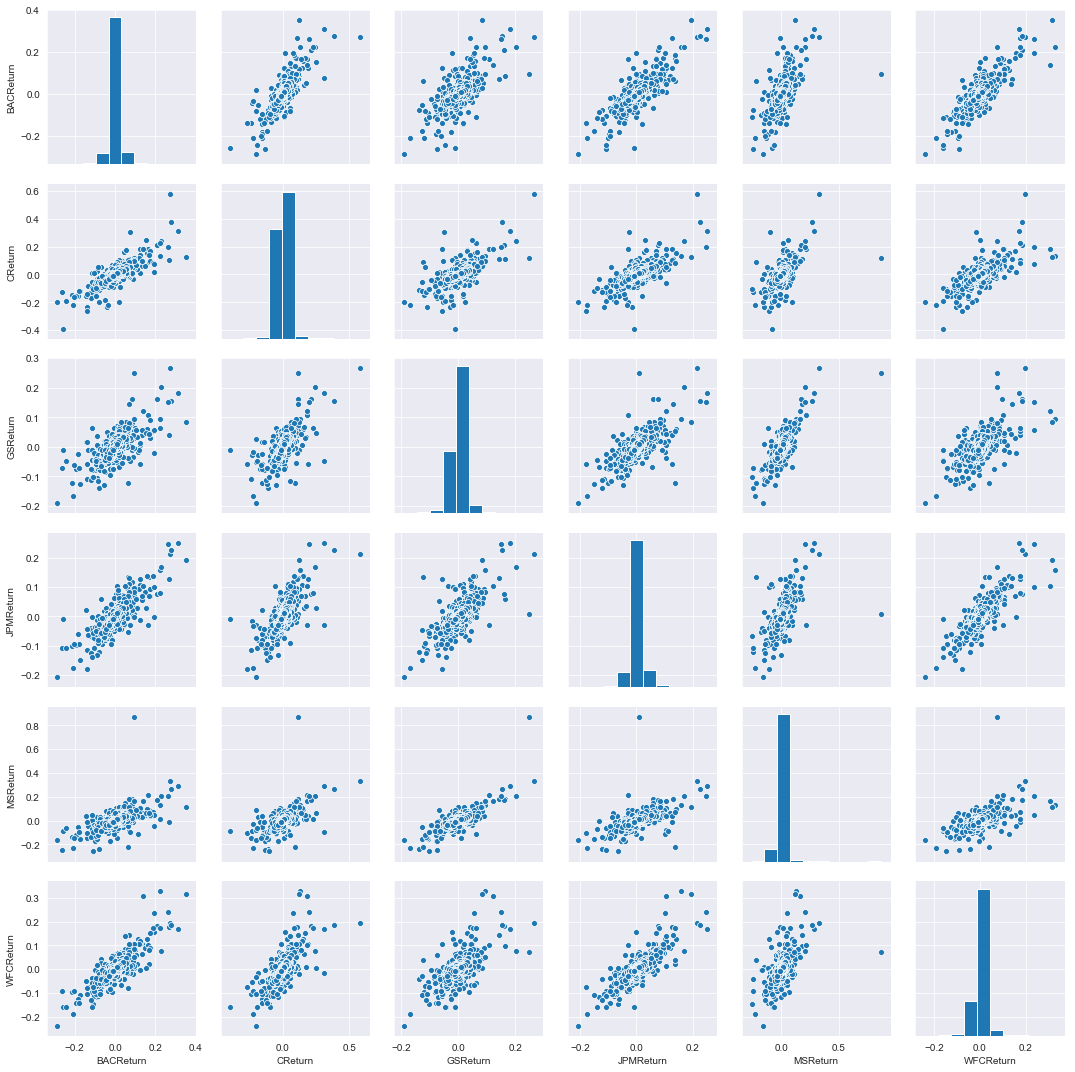

In [13]:
sns.set_style('darkgrid')
plt.tight_layout()
sns.pairplot(returns[1:])

In [76]:
#using returns, we figure out the what dates each bank stock 
#had the best and worst single day returns.

In [15]:
returns.idxmin()
#4 of them on Inauguration day

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [16]:
#Best single day gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [17]:
returns.std()
# Citigroup has the Riskiest year as their std is the lowest. 

BACReturn    0.036647
CReturn      0.038672
GSReturn     0.025390
JPMReturn    0.027667
MSReturn     0.037819
WFCReturn    0.030238
dtype: float64

In [18]:
#Similar risk profiles for the year 2015 
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

Text(0.5, 1.0, 'MS Returns of Morgan Stanley (2015)')

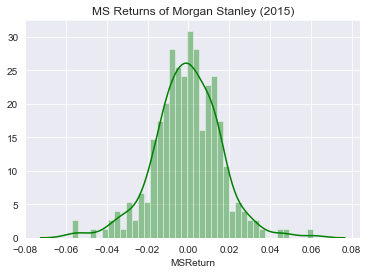

In [28]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],color = 'green',bins = 40)
plt.title('MS Returns of Morgan Stanley (2015)')
# Distribution of returns for Morgan Stanley for the year 2015

From the graph above, we can state that the results are pretty stable
as the values deviates only 0.06 from the average.

Text(0.5, 1.0, '2008 Returns for Citigroup')

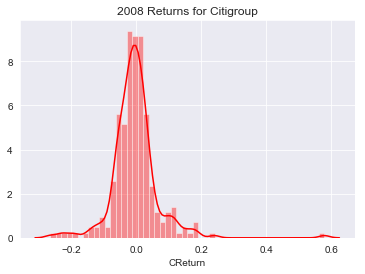

In [35]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['CReturn'],color = 'red', bins = 50)
plt.title('2008 Returns for Citigroup')

From the distplot, we observe that the standard deviation is quite stretched out (especially at 0.6 which is 10x more than the MS Returns for Morgan Stanley in 2015) 

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

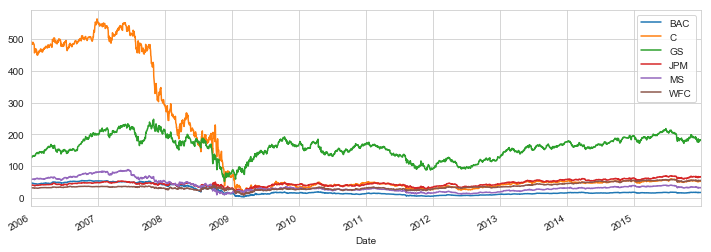

In [41]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label = tick, figsize = (12,4))

plt.legend()

From the line plot, we can see that Citigroup stocks crashed after 2008 (Great Recesion)
The interesting thing is that GS stocksbounces back after the 2008 crash.

In [47]:
bank_stocks.xs(key='Close',axis = 1, level='Stock Info').iplot()

Now for the next part of the project we will analyse the moving avergaes for the stocks in the year 2008

Lets plot the 30 day average against the Close Price for the Bank of America's stock for the year 2008

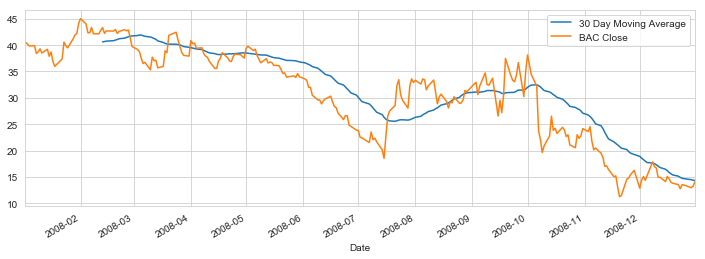

In [53]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window = 30).mean().plot(label = '30 Day Moving Average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

Now we create a heatmap of the correlation between the stocks Close Price.

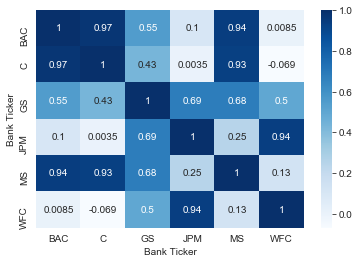

In [59]:
sns.heatmap(bank_stocks.xs(key='Close',axis = 1, level = 'Stock Info').corr(),annot = True, cmap = 'Blues')

Correlation between the closing stock prices of all the banks

In [60]:
bank_corr = bank_stocks.xs(key='Close',axis = 1, level = 'Stock Info').corr()

In [61]:
bank_corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


Using Iplot, we'll create a candle plot of Bank of Amercia's stock from Jan 1st 2015 to Jan 1st 2016

In [75]:
BAC15 = BAC[['Open','High','Low','Close']].loc['2007-01-01':'2016-01-01']
BAC15.iplot(kind = 'candle')

From the iplot above we can see that the stock market crashed in 2008.